# Breast Cancer Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/training_data.csv")
df = df.dropna(how='all', axis='columns')

In [ ]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

# New Section

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
df = df.rename(columns={"diagnosis":"label"})
print(df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<Axes: xlabel='label', ylabel='count'>

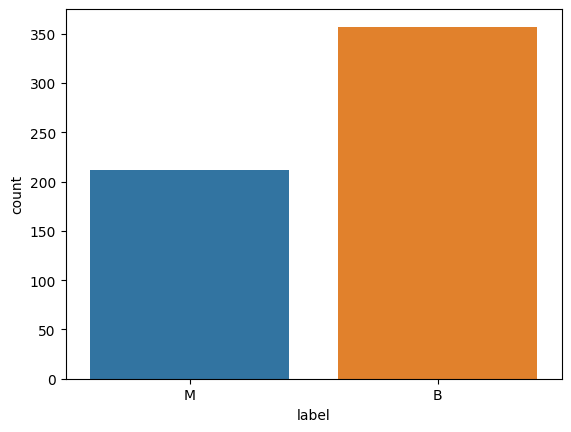

In [ ]:
sns.countplot(x="label", data=df)

In [ ]:
print("Distribution of data: ", df['label'].value_counts())

Distribution of data:  B    357
M    212
Name: label, dtype: int64


In [ ]:
y = df['label'].values

In [ ]:
print("Labels before encodeing are: ", np.unique(y))

Labels before encodeing are:  ['B' 'M']


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
Y = labelencoder.fit_transform(y)

In [ ]:
print("Labels after encodeing are: ", np.unique(Y))

Labels after encodeing are:  [0 1]


In [ ]:
X = df.drop(labels=['label', 'id'], axis=1)
print(X.describe().T)

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of training data:  (426, 30)
Shape of test data:  (143, 30)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
7/7 [==============================] - 7s 35ms/step - loss: 0.6986 - accuracy: 0.4695 - val_loss: 0.6961 - val_accuracy: 0.4266
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6959 - accuracy: 0.4624 - val_loss: 0.6874 - val_accuracy: 0.4615
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6850 - accuracy: 0.4883 - val_loss: 0.6788 - val_accuracy: 0.5594
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6762 - accuracy: 0.5704 - val_loss: 0.6697 - val_accuracy: 0.6993
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6660 - accuracy: 0.6432 - val_loss: 0.6604 - val_accuracy: 0.7972
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6635 - accuracy: 0.6643 - val_loss: 0.6502 - val_accuracy: 0.8951
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6551 - accuracy: 0.6925 - val_loss: 0.6389 - val_accuracy: 0.9231
Epoch 8/100
7/7 [===

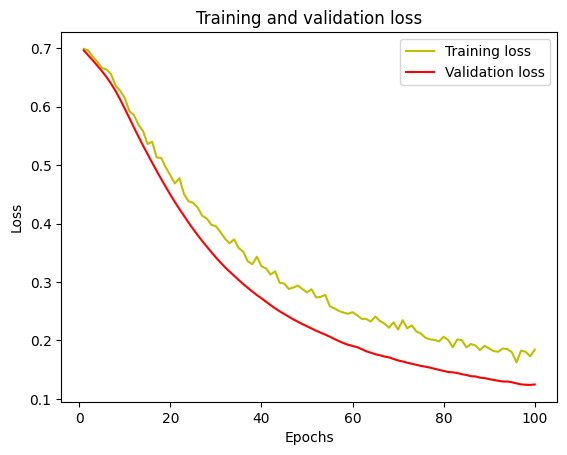

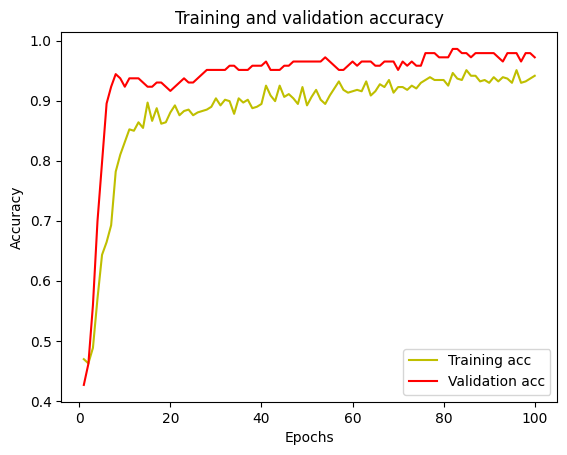

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step
[[0.24522853]
 [0.98446876]
 [0.9352882 ]
 [0.0294847 ]
 [0.02413676]
 [0.99967885]
 [0.9990596 ]
 [0.87153864]
 [0.5486711 ]
 [0.12263858]
 [0.10708637]
 [0.8589419 ]
 [0.11593826]
 [0.5476525 ]
 [0.12356118]
 [0.93934226]
 [0.10375421]
 [0.01273529]
 [0.0049741 ]
 [0.9941572 ]
 [0.49358237]
 [0.06989779]
 [0.9988061 ]
 [0.02612736]
 [0.03736406]
 [0.02623731]
 [0.20174785]
 [0.03976001]
 [0.0496145 ]
 [0.99265975]
 [0.03023694]
 [0.05016411]
 [0.0141668 ]
 [0.11147965]
 [0.01679381]
 [0.03774157]
 [0.59348387]
 [0.05353329]
 [0.9739794 ]
 [0.17319606]
 [0.01762176]
 [0.8286583 ]
 [0.10889048]
 [0.06012958]
 [0.06052481]
 [0.11172087]
 [0.00594685]
 [0.02143599]
 [0.11096868]
 [0.19166425]
 [0.96088284]
 [0.99691415]
 [0.31257802]
 [0.05794237]
 [0.01024647]
 [0.25191364]
 [0.02206251]
 [0.9997867 ]
 [0.79975677]
 [0.04396365]
 [0.09949433]
 [0.9944665 ]
 [0.9969771 ]
 [0.17386425]
 [0.03370239]
 [0.34061506]
 [0.98190594]
 [0.9990982

<Axes: >

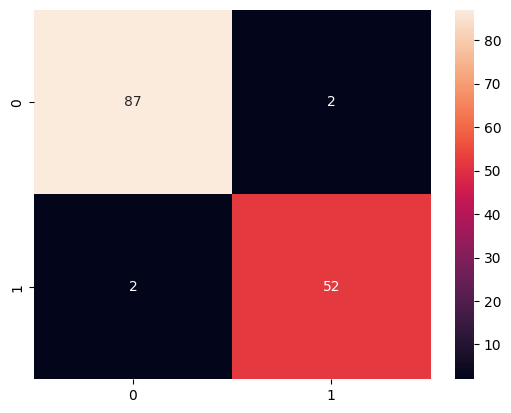

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [ ]:
print(X_test[0:1])
print(model.predict(X_test[0:1]))

[[0.25978513 0.30064254 0.25775689 0.14354189 0.42448316 0.26507576
  0.18755858 0.18991054 0.43686869 0.29001685 0.10305993 0.1511227
  0.08198652 0.04387017 0.17812829 0.12661099 0.06820707 0.19643872
  0.1398379  0.09297569 0.25044468 0.33635394 0.22730216 0.12109221
  0.4717031  0.20423786 0.21333866 0.34879725 0.2856298  0.2129083 ]]
1/1 [==============================] - 0s 28ms/step
[[0.2452285]]
